In [1]:
import os

#import dotenv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.multiclass import OneVsRestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import pickle

filename = '/content/drive/MyDrive/Sorbonne_Data_challenge/hgb.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)

In [ ]:
# Lecture des features
X_train = pd.read_csv("/content/drive/MyDrive/Sorbonne_Data_challenge/x_test.csv", index_col=0)
X_test = pd.read_csv("/content/drive/MyDrive/Sorbonne_Data_challenge/x_test.csv", index_col=0)

# Lecture des labels
y_train = pd.read_csv("/content/drive/MyDrive/Sorbonne_Data_challenge/y_train.csv", index_col=0)
y_test = pd.read_csv("/content/drive/MyDrive/Sorbonne_Data_challenge/y_test.csv", index_col=0)

In [ ]:
y_pred = model.predict(X_test)

100%|===================| 4610/4621 [01:14<00:00]       

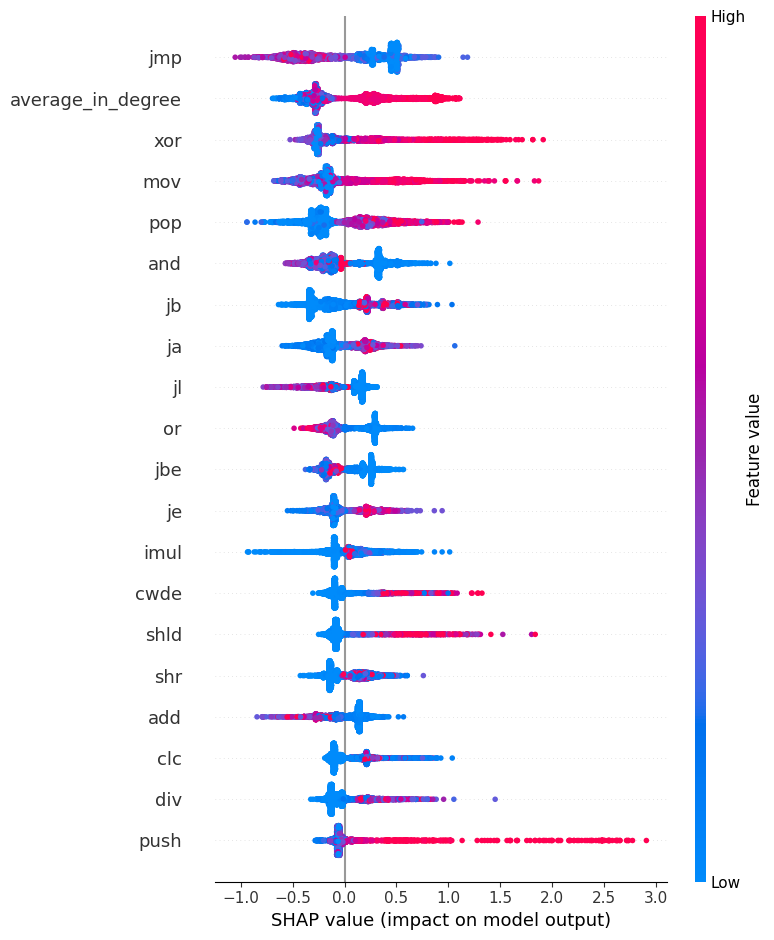

In [ ]:
import shap
import pandas as pd

first_label_classifier = model.estimators_[0]
sample_idx = 0
sample = X_train.iloc[sample_idx:sample_idx+1]

# Appliquer SHAP
#explainer = shap.Explainer(first_label_classifier, X_train)
shap_values = explainer.shap_values(X_train, check_additivity=False)


#shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train)


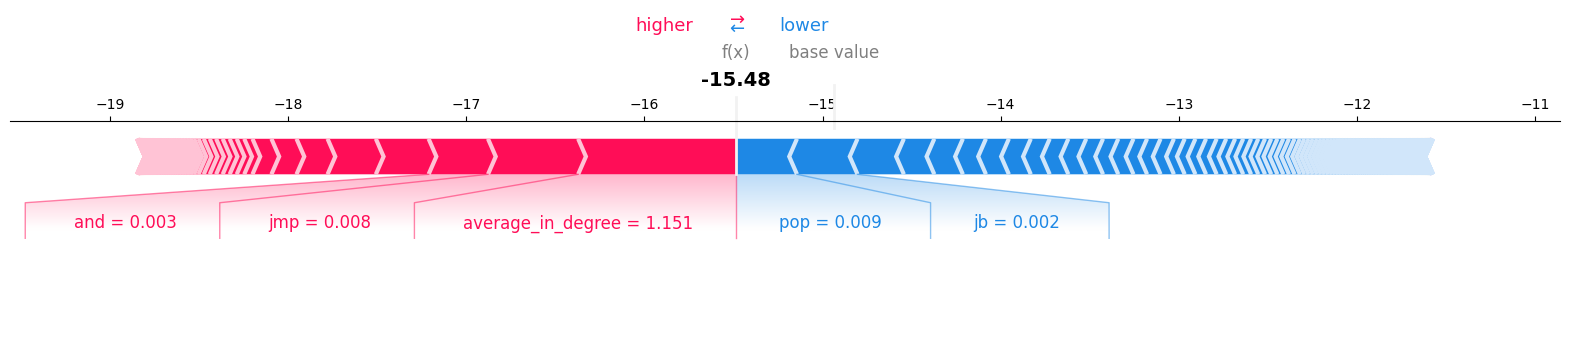

In [ ]:

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[2], sample.apply(lambda x : x.round(3)), matplotlib=True)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy globale moyenne :", accuracy)
print("F1 score global (macro) :", f1)
print("\nClassification report global :")

report = classification_report(y_test, y_pred, output_dict=True)

df_report = pd.DataFrame(report).transpose()

df_report_sorted = df_report.sort_values(by='f1-score', ascending=False)

print(df_report_sorted)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy globale moyenne : 0.0869941571088509
F1 score global (macro) : 0.4922617167000247

Classification report global :


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


     precision  recall  f1-score  support
13         1.0     1.0       1.0      1.0
198        1.0     1.0       1.0      1.0
130        1.0     1.0       1.0      3.0
137        1.0     1.0       1.0      2.0
328        1.0     1.0       1.0      2.0
..         ...     ...       ...      ...
452        0.0     0.0       0.0      0.0
448        0.0     0.0       0.0      0.0
445        0.0     0.0       0.0      0.0
444        0.0     0.0       0.0      1.0
443        0.0     0.0       0.0      2.0

[457 rows x 4 columns]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
df_report.iloc[26]

,26
precision,0.941176
recall,0.941176
f1-score,0.941176
support,17.000000


 99%|===================| 4565/4621 [00:42<00:00]       

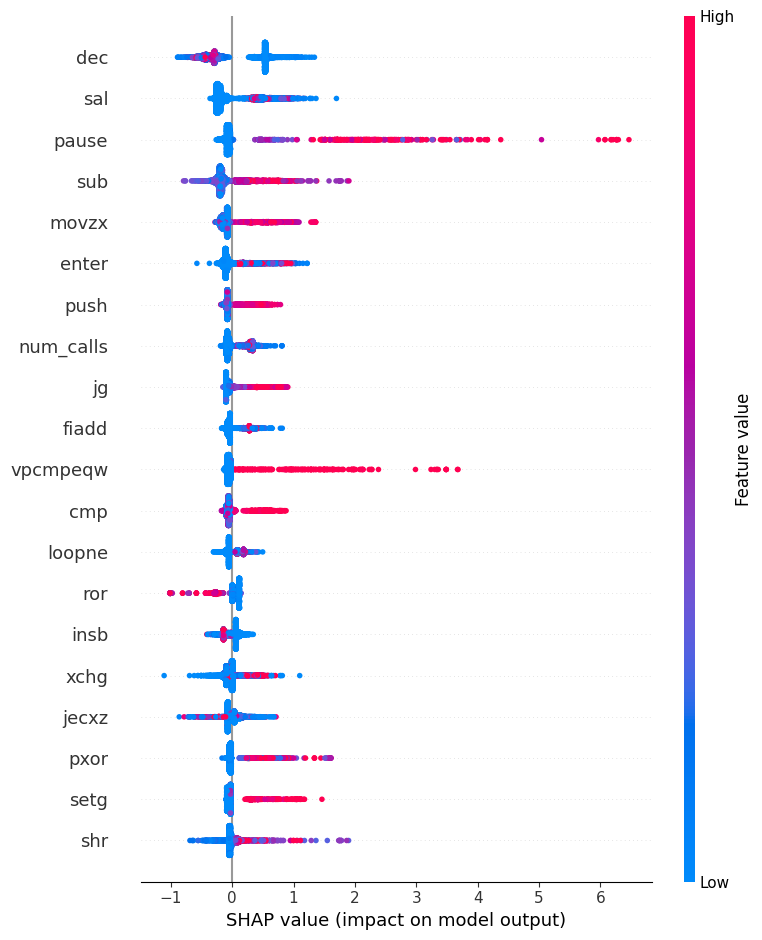

In [ ]:
import shap
import pandas as pd

first_label_classifier = model.estimators_[26]

# Appliquer SHAP
explainer = shap.Explainer(first_label_classifier, X_train)
shap_values = explainer.shap_values(X_train, check_additivity=False)


shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train)


In [ ]:
shap_values.values.shape

(4621, 290)

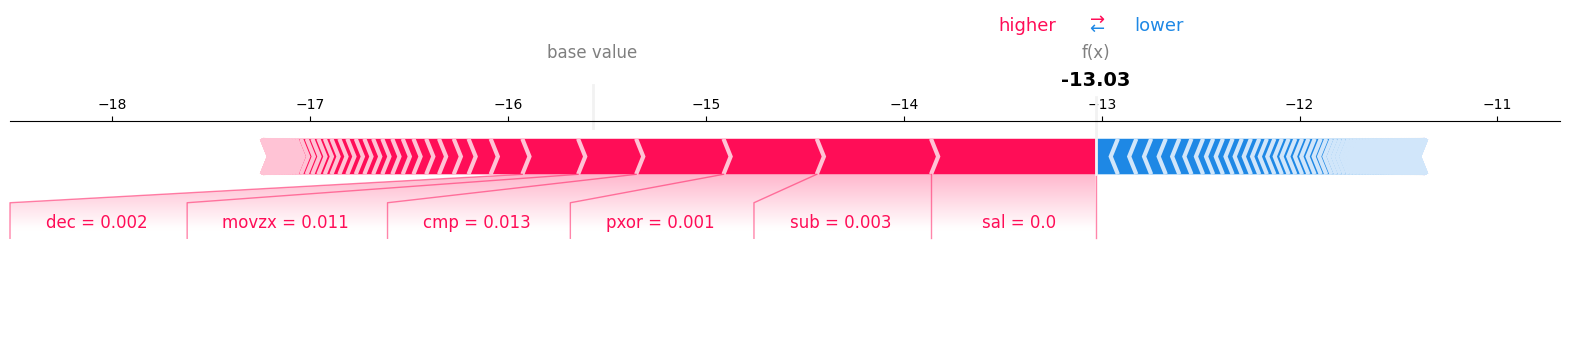

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[11].values, sample.apply(lambda x : x.round(3)), matplotlib=True)


In [ ]:
import shap
import pandas as pd

first_label_classifier = model.estimators_[1]

# Appliquer SHAP
explainer = shap.Explainer(first_label_classifier, X_train)
shap_values = explainer.shap_values(X_train, check_additivity=False)


shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train)


100%|===================| 4604/4621 [02:25<00:00]       

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was -9.799586, while the model output was -8.560263. If this difference is acceptable you can set check_additivity=False to disable this check.

In [ ]:
y_train.reset_index()[y_train.reset_index()['index'] == 8504]

,index,64-bit execution via heavens gate,64bits,PEB access,accept command line arguments,access the Windows event log,act as TCP client,allocate RW memory,allocate RWX memory,allocate memory,...,winzip,wise,worm,write and execute a file,write clipboard data,write file on Linux,write file on Windows,write pipe,xorcrypt,yoda
11,8504,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
y_train[y_train['bypass Windows File Protection'] == 1]

,64-bit execution via heavens gate,64bits,PEB access,accept command line arguments,access the Windows event log,act as TCP client,allocate RW memory,allocate RWX memory,allocate memory,allocate or change RW memory,...,winzip,wise,worm,write and execute a file,write clipboard data,write file on Linux,write file on Windows,write pipe,xorcrypt,yoda
8504,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2958,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
137,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7277,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12403,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5124,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
15305,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7526,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19626,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
